# Règles bayesiennes naïves 

#### Description de l'ensemble de données : 
###### il s'agit d'une base de donnees sur les paiements par défaut des clients par carte de crédit à Taïwan depuis 2005
###### Il y a 30000 observations et aucune donnée manquante.
###### Il se compose de 25 colonnes:
    -ID : ID de chaque client
    -LIMIT_BAL : Montant du crédit accordé en dollars NT (comprend crédit individuel et familial/supplémentaire
    -SEXE : Genre (1=homme, 2=femme)
    -FORMATION : (1=école supérieure, 2=université, 3=lycée, 4=autres, 5=inconnu, 6=inconnu)
    -MARIAGE : Etat civil (1=marié, 2=célibataire, 3=autres)
    -AGE : Âge en années
    -PAY_0 : Statut de remboursement en septembre 2005 (-1=payer en bonne et due forme , 1=retard de paiement d'un mois, 2=retard de paiement de deux mois, … 8=retard de paiement de huit mois, 9=retard de paiement de neuf mois et plus)
    -PAY_2 : Statut de remboursement en août 2005 (barème identique à ci-dessus)
    -PAY_3 : Statut de remboursement en juillet 2005 (barème identique à ci-dessus)
    -PAY_4 : Statut de remboursement en juin 2005 (barème identique à ci-dessus)
    -PAY_5 : Statut de remboursement en mai 2005 (barème identique à ci-dessus)
    -PAY_6 : Statut de remboursement en avril 2005 (barème identique à ci-dessus)
    -BILL_AMT1 : Montant du relevé de facture en septembre 2005 (dollar NT)
    -BILL_AMT2 : Montant du relevé de facture en août 2005 (dollar NT)
    -BILL_AMT3 : Montant du relevé de facture en juillet 2005 (dollar NT)
    -BILL_AMT4 : Montant du relevé de facture en juin 2005 (dollar NT)
    -BILL_AMT5 : Montant du relevé de facture en mai 2005 (dollar NT)
    -BILL_AMT6 : Montant du relevé de facture en avril 2005 (dollar NT)
    -PAY_AMT1 : Montant du paiement précédent en septembre 2005 (dollar NT)
    -PAY_AMT2 : Montant du paiement précédent en août 2005 (dollar NT)
    -PAY_AMT3 : Montant du paiement précédent en juillet 2005 (dollar NT)
    -PAY_AMT4 : Montant du paiement précédent en juin 2005 (dollar NT)
    -PAY_AMT5 : Montant du paiement précédent en mai 2005 (dollar NT)
    -PAY_AMT6 : Montant du paiement précédent en avril 2005 (dollar NT)
    -default.payment.next.month : Paiement par défaut (1=oui, 0=non)

In [16]:
# Importation des packages
library(tidyverse)
library(psych)
library(Amelia)
library(caret)
library(ROCR)
library(ggplot2)

In [17]:
# Chargement des donnees
credit<- read.csv("UCI_Credit_Card.csv")
#Structure des donnees
str(credit)

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num  3913 2682 29239 46990 8617 ...
 $ BILL_AMT2                 : num  3102 1725 14027 48233 5670 ...
 $ BILL_AMT3                 : n

In [18]:
#Affichage des 10 premieres lignes
head(credit, 10)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
describe(credit)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ID,1,30000,1.500050e+04,8.660398e+03,15000.5,1.500050e+04,11119.5000,1,30000,29999,0.00000000,-1.20012000,5.000083e+01
LIMIT_BAL,2,30000,1.674843e+05,1.297477e+05,140000.0,1.516074e+05,133434.0000,10000,1000000,990000,0.99276768,0.53573780,7.490985e+02
SEX,3,30000,1.603733e+00,4.891292e-01,2.0,1.629667e+00,0.0000,1,2,1,-0.42414101,-1.82016507,2.823989e-03
EDUCATION,4,30000,1.853133e+00,7.903487e-01,2.0,1.782167e+00,1.4826,0,6,6,0.97087495,2.07773666,4.563080e-03
MARRIAGE,5,30000,1.551867e+00,5.219696e-01,2.0,1.553625e+00,0.0000,0,3,3,-0.01873981,-1.36344964,3.013593e-03
AGE,6,30000,3.548550e+01,9.217904e+00,34.0,3.469225e+01,8.8956,21,79,58,0.73217265,0.04389306,5.321959e-02
PAY_0,7,30000,-1.670000e-02,1.123802e+00,0.0,-6.237500e-02,1.4826,-2,8,10,0.73190173,2.71968029,6.488271e-03
PAY_2,8,30000,-1.337667e-01,1.197186e+00,0.0,-1.985833e-01,0.0000,-2,8,10,0.79048597,1.56965135,6.911956e-03
PAY_3,9,30000,-1.662000e-01,1.196868e+00,0.0,-2.369167e-01,0.0000,-2,8,10,0.84059776,2.08354957,6.910118e-03
PAY_4,10,30000,-2.206667e-01,1.169139e+00,0.0,-3.068750e-01,0.0000,-2,8,10,0.99952945,3.49576763,6.750025e-03


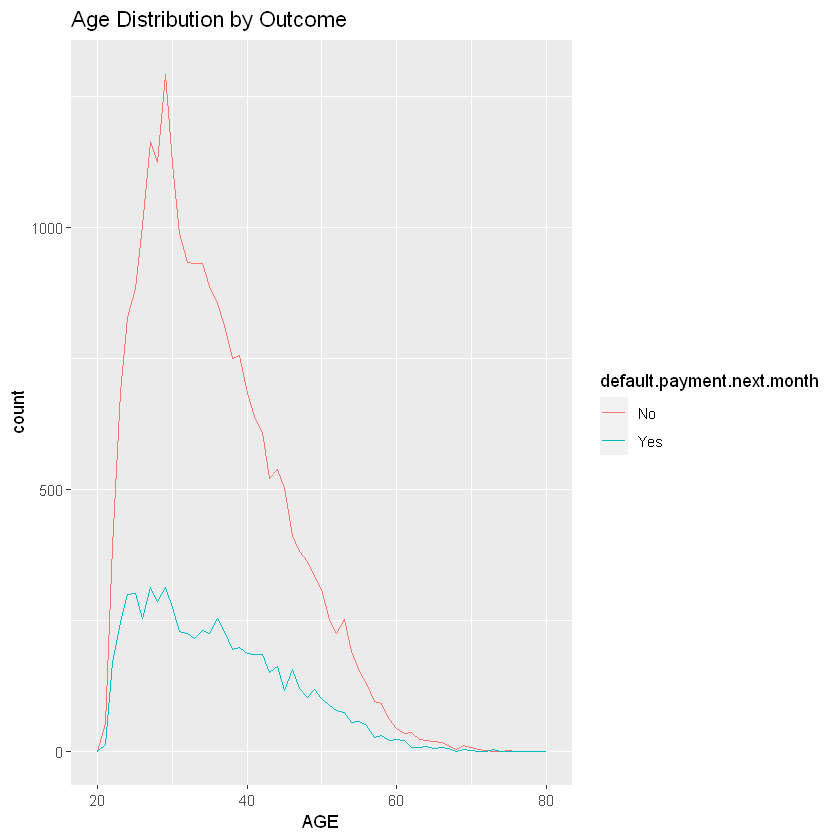

In [31]:
#Data Visualization
#Visual 1
ggplot(credit, aes(AGE, colour = default.payment.next.month)) +
geom_freqpoly(binwidth = 1) + labs(title="Age Distribution by Outcome")

### Transformer les variables en classes appropriées :

In [5]:
credit$SEX<-factor(credit$SEX, levels=1:2, labels=c("Male", "Female"))
credit$EDUCATION<-as.factor(credit$EDUCATION)
credit$MARRIAGE<-as.factor(credit$MARRIAGE)
credit$default.payment.next.month<-factor(credit$default.payment.next.month, levels = 0:1, labels=c("No", "Yes"))

In [6]:
head(credit)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,Female,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
2,120000,Female,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
3,90000,Female,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
4,50000,Female,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
5,50000,Male,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No
6,50000,Male,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,No


In [7]:
str(credit)

'data.frame':	30000 obs. of  25 variables:
 $ ID                        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ LIMIT_BAL                 : num  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : Factor w/ 2 levels "Male","Female": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : Factor w/ 7 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE                  : Factor w/ 4 levels "0","1","2","3": 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : num  3913 2682 29239 46990 8617 ...
 $ 

Afin de faire des prédictions sur l'ensemble de données à l'aide du classificateur Naive Bayes, je dois diviser l'ensemble de données en ensembles d'entraînement et de test : 

In [10]:
set.seed(5)
index<-createDataPartition(credit$default.payment.next.month, p=.75, list=F)
Train<-credit[index,]
Test<-credit[-index,]

In [11]:
library(e1071)
model_naive<-naiveBayes(default.payment.next.month~SEX+MARRIAGE+AGE+PAY_0+PAY_6+BILL_AMT1+BILL_AMT6+PAY_AMT1+PAY_AMT6, Train, 
                        laplace=1)

Maintenant, j'évalue le modèle construit :

In [12]:
pred_naive<-predict(model_naive, newdata = Test)
confusionMatrix(data=pred_naive, reference = Test$default.payment.next.month)

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  5235  911
       Yes  606  748
                                          
               Accuracy : 0.7977          
                 95% CI : (0.7885, 0.8068)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 3.507e-05       
                                          
                  Kappa : 0.3716          
                                          
 Mcnemar's Test P-Value : 5.943e-15       
                                          
            Sensitivity : 0.8963          
            Specificity : 0.4509          
         Pos Pred Value : 0.8518          
         Neg Pred Value : 0.5524          
             Prevalence : 0.7788          
         Detection Rate : 0.6980          
   Detection Prevalence : 0.8195          
      Balanced Accuracy : 0.6736          
                                          
       'Positive' Class : No              
                        

La précision du modèle est de 79,77 %, ce qui est légèrement supérieur au taux d'absence d'information. 

L'étape suivante consiste à trouver l'aire sous la courbe :

[[1]]
[1] 0.7137759

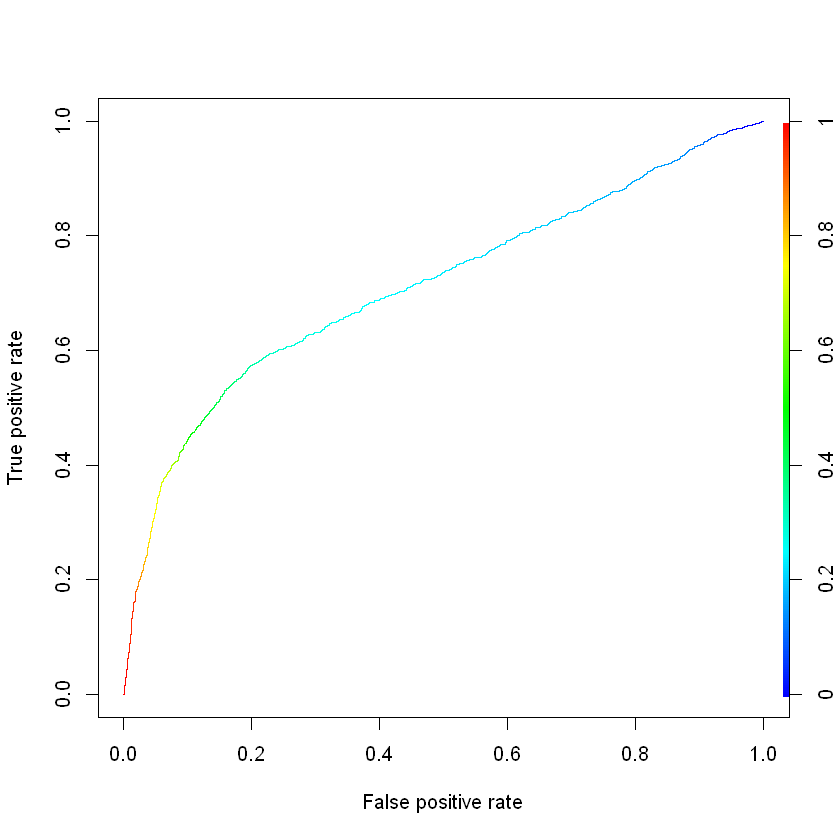

In [13]:
pred_test_naive<-predict(model_naive, newdata = Test, type="raw")
p_test_naive<-prediction(pred_test_naive[,2], Test$default.payment.next.month)
perf_naive<-performance(p_test_naive, "tpr", "fpr")
plot(perf_naive, colorize=T)
performance(p_test_naive, "auc")@y.values

L'AuC du modèle est de 0,71, ce qui est supérieur au seuil (0,5)